Imported the Data Set

In [234]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mp
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Names the Data set 

In [235]:
df = pd.read_csv("twitchdata-update.csv.xls")

Check the Head to make sure data is there.

In [307]:
df.head(10)

,Channel,Watch_time_min,Stream_time_min,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English
6,NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,True,False,English
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English
8,loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926,True,False,English
9,Anomaly,2865429915,92880,125408,12377,2607076,1532689,36350662,True,False,English


Check the overall mean, min, max, etc...

In [325]:
df.describe()

,Watch_time_min,Stream_time_min,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


Check each value for columns. Int, float, bool, null, etc...

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           1000 non-null   object
 1   Watch_time_min    1000 non-null   int64 
 2   Stream_time_min   1000 non-null   int64 
 3   Peak_viewers      1000 non-null   int64 
 4   Average_viewers   1000 non-null   int64 
 5   Followers         1000 non-null   int64 
 6   Followers_gained  1000 non-null   int64 
 7   Views_gained      1000 non-null   int64 
 8   Partnered         1000 non-null   bool  
 9   Mature            1000 non-null   bool  
 10  Language          1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


Show Columns that I may need to Rename

In [345]:
df.columns

Index(['Channel', 'Watch_time_min', 'Stream_time_min', 'Peak_viewers',
       'Average_viewers', 'Followers', 'Followers_gained', 'Views_gained',
       'Partnered', 'Mature', 'Language'],
      dtype='object')

Fixed Columns - Cleaned Data

In [346]:
df.rename(columns = {'Watch time(Minutes)':'Watch_time_min', 'Stream time(minutes)':'Stream_time_min', 'Peak viewers':'Peak_viewers', 'Average viewers':'Average_viewers', 'Followers gained':'Followers_gained', 'Views gained':'Views_gained'}, inplace = True)

What are the top ten streamers based on Stream time, Average views, and overall Followers? - Question 1

In [347]:
pd.DataFrame(df[(df["Stream_time_min"] >= 100000) & (df["Average_viewers"] >= 10000) & (df['Followers'] >=2500000)].Channel)

,Channel
0,xQcOW
1,summit1g
4,Tfue
6,NICKMERCS
8,loltyler1
10,TimTheTatman
11,LIRIK
16,sodapoppin
18,alanzoka
51,Bugha


Information about top 10 streamers and what makes them the top - Visual 1

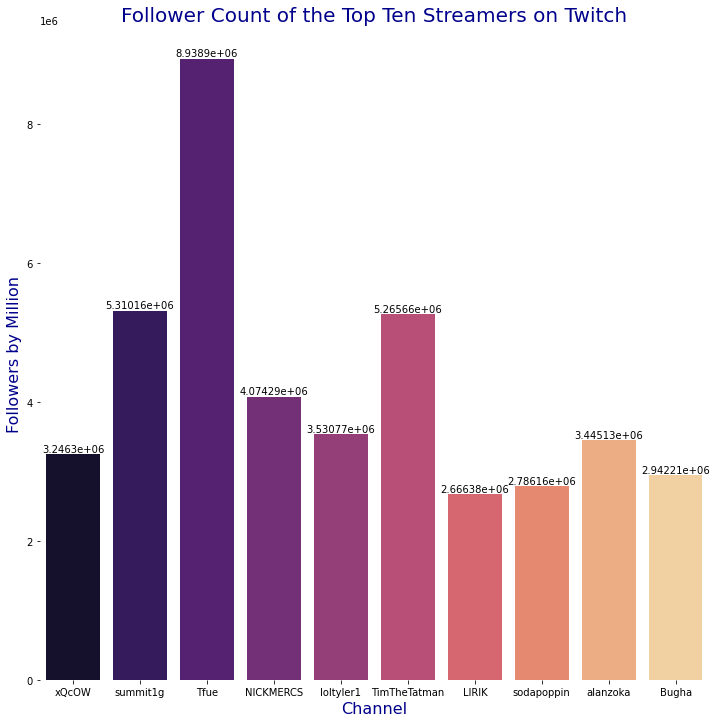

In [348]:
plt.figure(figsize=(12, 12))
top_ten = df[(df["Stream_time_min"] >= 100000) & (df["Average_viewers"] >= 10000) & (df['Followers'] >=2500000)]
ax = sns.barplot(x="Channel", y="Followers", data=top_ten, ci=None, palette='magma');
plt.xlabel('Channel', fontsize=16, color='darkblue');
plt.ylabel("Followers by Million", fontsize=16, color='darkblue');
plt.title("Follower Count of the Top Ten Streamers on Twitch", fontsize=20, color='darkblue');
sns.despine(left=True, bottom=True)
for i in ax.containers:
    ax.bar_label(i,)

Followers Gained for Top 10 Channels based on Stream Time - Visual 2

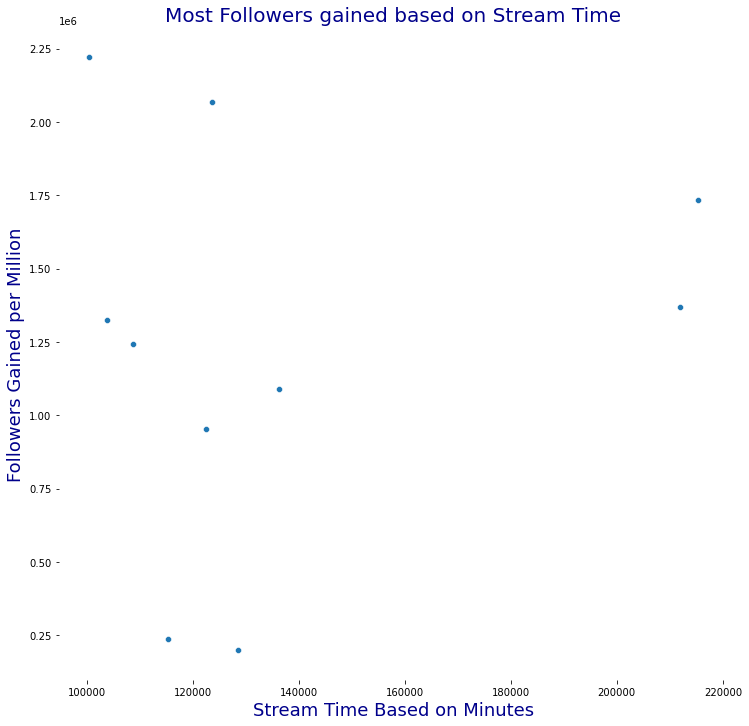

In [349]:
top_ten = df[(df["Stream_time_min"] >= 100000) & (df["Average_viewers"] >= 10000) & (df['Followers'] >=2500000)]
plt.figure(figsize=(12, 12))
sns.scatterplot(x='Stream_time_min', y='Followers_gained', data=top_ten)
plt.title('Most Followers gained based on Stream Time', color="darkBlue", fontsize=20)
plt.xlabel('Stream Time Based on Minutes', color="darkBlue", fontsize=18)
plt.ylabel('Followers Gained per Million', color="darkBlue", fontsize=18)
sns.despine(left=True, bottom=True)

Average Views for Top 10 Streamers - Visual 3

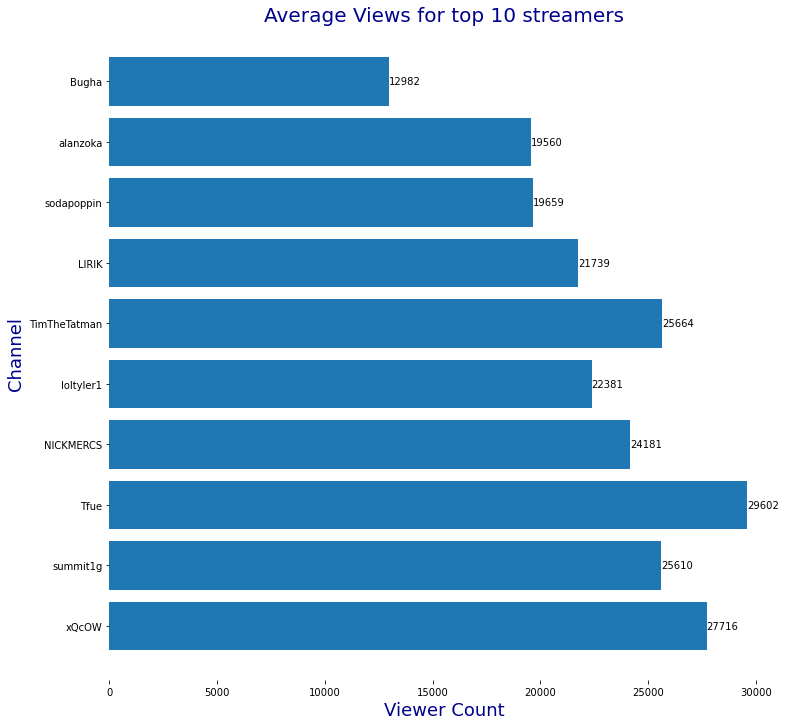

In [350]:
plt.figure(figsize=(12, 12))
barhplot = plt.barh(top_ten.Channel, top_ten.Average_viewers)
plt.bar_label(barhplot, labels =top_ten.Average_viewers)
plt.title('Average Views for top 10 streamers', color="darkBlue", fontsize=20)
plt.xlabel('Viewer Count', color="darkBlue", fontsize=18)
plt.ylabel('Channel', color="darkBlue", fontsize=18)
sns.despine(left=True, bottom=True)
barhplot;

What is Considered the bottom of the list based on Stream Time, average views, and followers? - Question 2

In [351]:
pd.DataFrame(df[(df["Stream_time_min"] <= 20000) & (df["Average_viewers"] <= 25000) & (df['Followers'] <=450000)])

,Channel,Watch_time_min,Stream_time_min,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
319,RiotGamesRU,352700745,17880,73049,19753,173861,75538,6832561,True,False,Russian
363,Flashpoint,311325840,19320,77708,11713,93616,93120,27828448,True,False,English
428,GarenaTW,273964050,12435,85416,22130,401222,21388,7818029,True,False,Chinese
483,winstrike_tv,243711495,19695,153252,12058,148183,148055,8767404,True,False,Russian
549,OGADotaPIT,216072855,18705,60846,10161,157820,48664,8333671,True,False,English
667,RTAinJapan,179880525,16155,42822,8383,71730,44766,2700751,True,False,Japanese
775,EAMaddenNFL,159449055,19995,57179,5697,241924,72319,5152605,True,False,English
811,DreamHackDota2_RU,152461155,6135,98717,22356,203419,30231,3637232,True,False,Russian
898,RebeuDeter,135843000,18510,24675,7141,215360,194128,2560454,True,False,French
932,StarCraft,130159470,14850,56109,6636,342409,22130,4110003,True,False,English


Information about top 10 streamers and what makes them the top - Visual 4

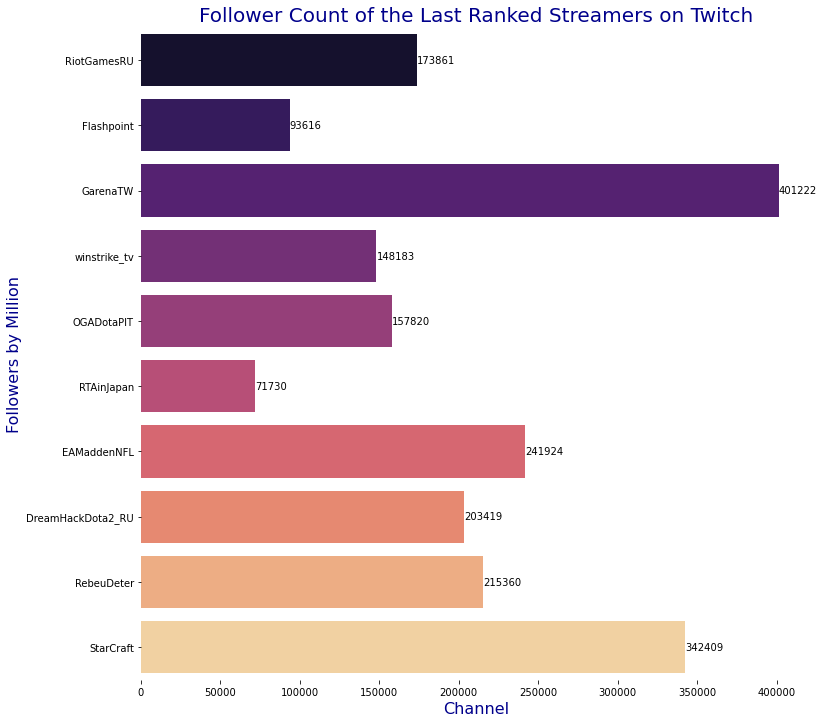

In [352]:
plt.figure(figsize=(12, 12))
last = df[(df["Stream_time_min"] <= 20000) & (df["Average_viewers"] <= 25000) & (df['Followers'] <=450000)]
ax = sns.barplot(x="Followers", y="Channel", data=last, ci=None, palette='magma');
plt.xlabel('Channel', fontsize=16, color='darkblue');
plt.ylabel("Followers by Million", fontsize=16, color='darkblue');
plt.title("Follower Count of the Last Ranked Streamers on Twitch", fontsize=20, color='darkblue');
sns.despine(left=True, bottom=True)
for i in ax.containers:
    ax.bar_label(i,)

Followers Gained for Top 10 Channels based on Stream Time - Visual 5

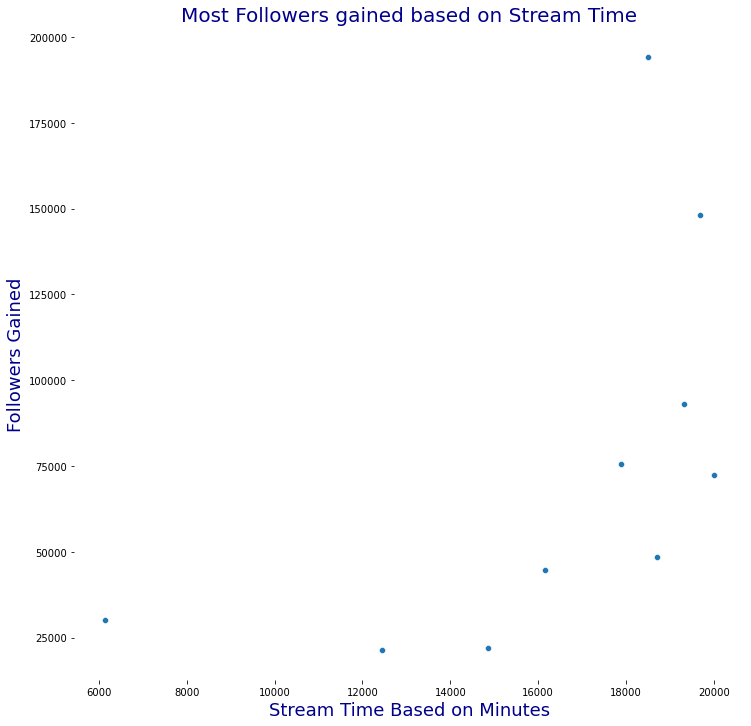

In [353]:

plt.figure(figsize=(12, 12))
sns.scatterplot(x='Stream_time_min', y='Followers_gained', data=last)
plt.title('Most Followers gained based on Stream Time', color="darkBlue", fontsize=20)
plt.xlabel('Stream Time Based on Minutes', color="darkBlue", fontsize=18)
plt.ylabel('Followers Gained', color="darkBlue", fontsize=18)
sns.despine(left=True, bottom=True)

Average Views for Top 10 Streamers - Visual 3

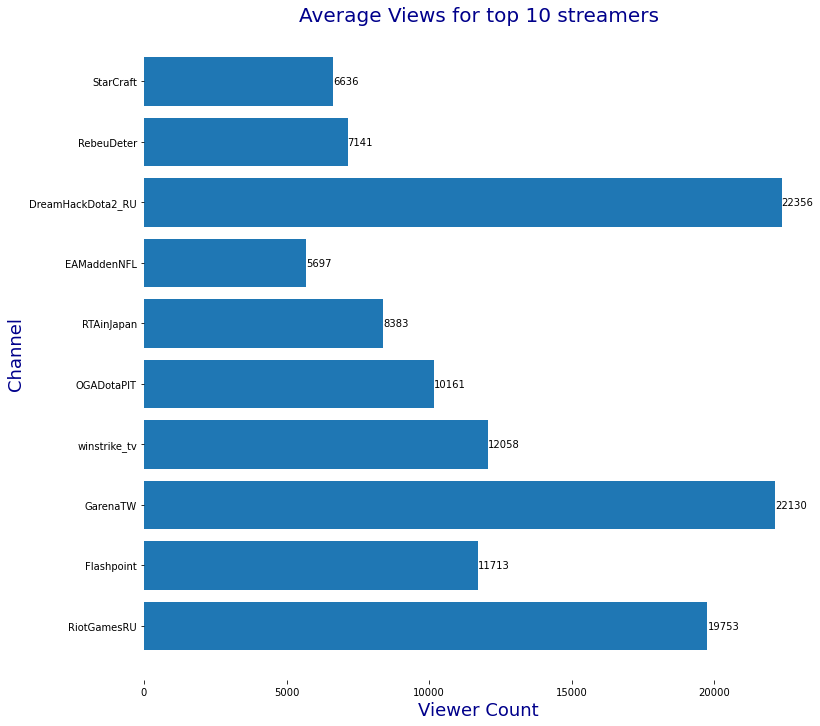

In [354]:
plt.figure(figsize=(12, 12))
barhplot = plt.barh(last.Channel, last.Average_viewers)
plt.bar_label(barhplot, labels =last.Average_viewers)
plt.title('Average Views for top 10 streamers', color="darkBlue", fontsize=20)
plt.xlabel('Viewer Count', color="darkBlue", fontsize=18)
plt.ylabel('Channel', color="darkBlue", fontsize=18)
sns.despine(left=True, bottom=True)

How many streamers are there for each language from this dataset? - Question 3

In [355]:
pd.DataFrame(df.Language.value_counts())

,Language
English,485
Korean,77
Russian,74
Spanish,68
French,66
Portuguese,61
German,49
Chinese,30
Turkish,22
Italian,17


How many viewers for each language, and whether they are partnered or not. - Visual 7

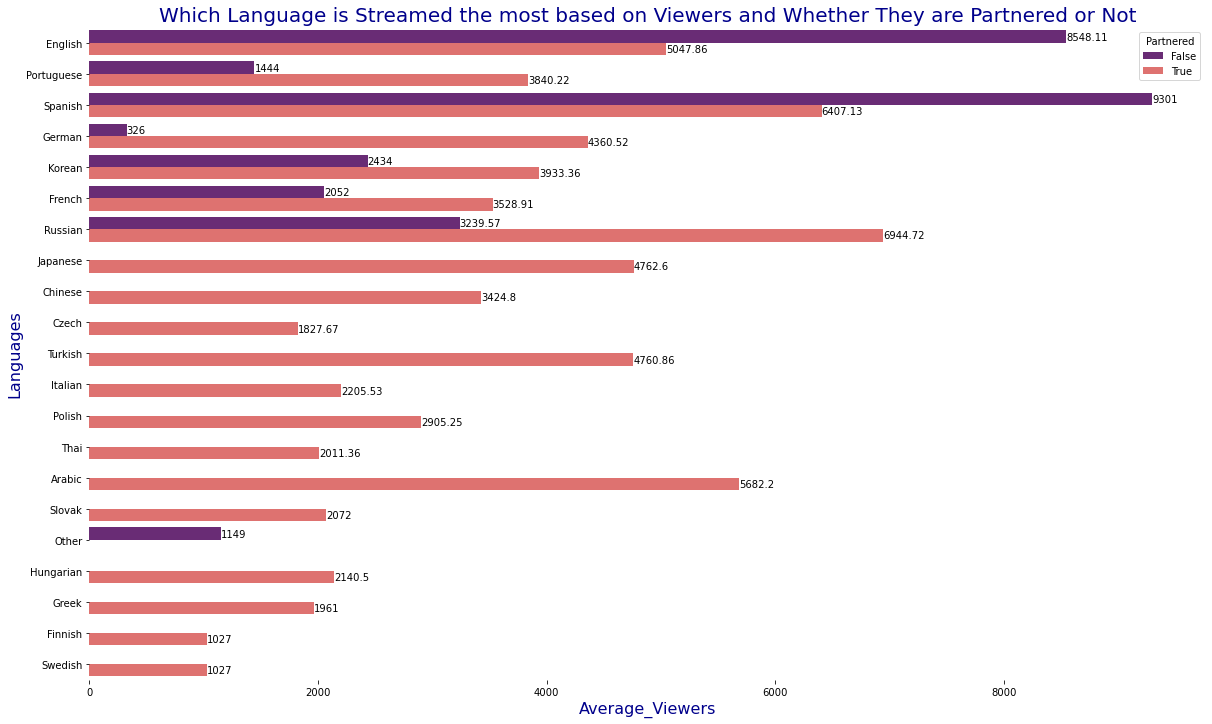

In [356]:
plt.figure(figsize=(20, 12))
ax = sns.barplot(x="Average_viewers", y="Language", data=df, ci=None, palette='magma', hue='Partnered');
plt.xlabel('Average_Viewers', fontsize=16, color='darkblue');
plt.ylabel("Languages", fontsize=16, color='darkblue');
plt.title("Which Language is Streamed the most based on Viewers and Whether They are Partnered or Not", fontsize=20, color='darkblue');
sns.despine(left=True, bottom=True)
for i in ax.containers:
    ax.bar_label(i,)

What Percent of Streamers are English Speaking Streamers? - Question 4

In [357]:
english_percent = round(len(df[df.Language == 'English']) / len(df) * 100)
print(f' There are {english_percent}% of English Speaking Twitch streamers')

 There are 48% of English Speaking Twitch streamers


For Each Language, what is the average followers gaines and views gained? - Question 5

In [358]:
pd.DataFrame(df.groupby('Language').agg({'Followers_gained':['mean'],'Views_gained': ['mean']}))

,Followers_gained,Views_gained
,mean,mean
Language,,
Arabic,479938.200000,2.779681e+06
Chinese,28209.933333,1.062829e+07
Czech,92805.000000,9.351374e+06
English,203294.319588,1.253701e+07
Finnish,29422.000000,1.028463e+07
French,181407.121212,1.017953e+07
German,172197.020408,8.387379e+06
Greek,51159.000000,4.148542e+06


How many English Streamers are in the top 75 percentile based on Average Viewers and Stream Time? - Question 6 

In [359]:
Viewer_threshold = df.Average_viewers.quantile(0.75)
Stream_threshold = df.Stream_time_min.quantile(0.75)
Top_25_percent = df[(df.Average_viewers > Viewer_threshold) & (df.Stream_time_min> Stream_threshold)]
Best_Lang = Top_25_percent[Top_25_percent.Language == 'English']
print("English", len(Best_Lang))

English 20


Which Streamer had the highest number of Peak Viewers in 1 Stream? - Question 7

In [360]:
Peak = df[(df.Peak_viewers == df.Peak_viewers.max())]
print(f'The peak number of viewers at once is {Peak.Channel}')


The peak number of viewers at once is 12    Riot Games (riotgames)
Name: Channel, dtype: object
